In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

in_file = 'Data.csv'
full_data = pd.read_csv(in_file)
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,����ؼ�ʾ�,20161010,1,9,0,1,0,0,0,1,raiders
1,����ؼ�ʾ�,20161010,1,8,0,0,0,0,0,1,communication
2,Chivele-Ӱ,20161010,1,6,0,1,0,0,0,1,raiders
3,shjansh,20161010,1,8,0,0,0,0,1,1,communication
4,pƮ���Ҷ,20161010,1,14,0,1,0,0,1,1,activity


In [2]:
full_data['people']=full_data['people'].apply(lambda x:len(x))
full_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,326.000000,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,7.392638,2.016085e+07,2.840491,257.027607,0.030675,0.950920,0.325153,0.205521,0.453988
std,2.743239,2.126520e+02,6.645231,486.905364,0.172700,0.216367,0.469152,0.404703,0.498644
min,3.000000,2.016032e+07,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,2.016071e+07,0.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,2.016093e+07,1.000000,104.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,2.016101e+07,3.000000,237.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,15.000000,2.016101e+07,67.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
full_data['starttime']=full_data['starttime'].apply(lambda x:(x-20160000))

In [4]:
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,10,1010,1,9,0,1,0,0,0,1,raiders
1,10,1010,1,8,0,0,0,0,0,1,communication
2,10,1010,1,6,0,1,0,0,0,1,raiders
3,7,1010,1,8,0,0,0,0,1,1,communication
4,9,1010,1,14,0,1,0,0,1,1,activity


In [10]:
act_data=full_data[(full_data['starttime']>923)&(full_data['starttime']<1010)]
act_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,8.405714,991.811429,2.171429,168.737143,0.040000,0.942857,0.102857,0.205714,0.462857
std,2.639438,29.530889,5.263656,500.025355,0.196521,0.232781,0.304644,0.405383,0.500049
min,3.000000,924.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1001.000000,0.000000,18.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,1002.000000,1.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,1009.000000,2.000000,128.500000,0.000000,1.000000,0.000000,0.000000,1.000000
max,15.000000,1009.000000,58.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
positive_data=act_data[(act_data['negative']==0)&(act_data['neutral']==0)]
positive_data

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
46,10,1009,1,6,0,0,0,0,1,1,communication
57,3,1009,1,8,0,0,0,0,1,1,raiders
128,6,1001,1,35,0,0,0,0,1,0,communication


In [25]:
negative_data=act_data[(act_data['negative']==1)]
negative_data

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
84,8,1006,3,20,1,0,0,0,1,0,help
90,8,1005,4,15,1,0,0,0,1,1,help
93,9,1004,3,64,1,0,0,0,0,1,help
98,8,1003,2,18,1,0,0,0,1,1,communication
123,10,1001,0,66,1,0,0,0,1,0,help
129,10,1001,0,37,1,0,0,0,0,0,communication
188,4,924,2,237,1,0,0,0,0,0,none


In [27]:
print act_data.shape[0]
print positive_data.shape[0]
print negative_data.shape[0]

175
3
7


In [29]:
emotion_data=pd.DataFrame({'positive':[3],'negative':[7],'neutral':[165]})
emotion_data

,negative,neutral,positive
0,7,165,3


Populating the interactive namespace from numpy and matplotlib


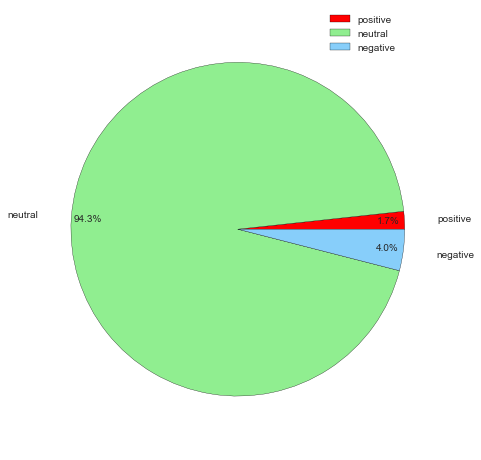

In [55]:
from matplotlib import pyplot as plt 
%pylab inline
#调节图形大小，宽，高
plt.figure(figsize=(6,8))
#定义饼状图的标签，标签是列表
labels = [u'positive',u'neutral',u'negative']
#每个标签占多大，会自动去算百分比
sizes = [3,165,7]
colors = ['red','lightgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 0,pctdistance = 0.9)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(100)
for t in p_text:
    t.set_size=(80)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()

In [58]:
for i in positive_data:
    print i


people
starttime
comments
pageviews
negative
neutral
official
hot
new
reply
type


Populating the interactive namespace from numpy and matplotlib


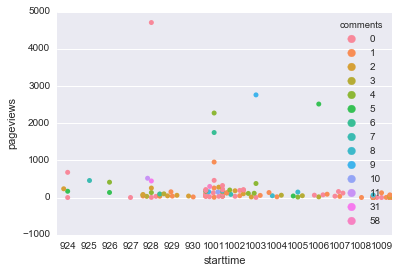

In [56]:
import matplotlib.pyplot as plt
%pylab inline
sns.swarmplot(x='starttime',y='pageviews',hue='comments',data=act_data)